In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spotify_songs.csv")
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
missing = df.isnull().sum()
print(missing)

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [4]:
#We want to override NaN values
df['track_name'].fillna(value='Unknown', inplace=True)
df['track_artist'].fillna(value='Unknown', inplace=True)
df['track_album_name'].fillna(value='Unknown', inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32833 non-null  object 
 2   track_artist              32833 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32833 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
pd.DataFrame({'count': df.shape[0], 'nulls' : df.isnull().sum(), 'nulls%' : df.isnull().mean()*100, 'cardinality' : df.nunique(),})


,count,nulls,nulls%,cardinality
track_id,32833,0,0.0,28356
track_name,32833,0,0.0,23450
track_artist,32833,0,0.0,10693
track_popularity,32833,0,0.0,101
track_album_id,32833,0,0.0,22545
track_album_name,32833,0,0.0,19744
track_album_release_date,32833,0,0.0,4530
playlist_name,32833,0,0.0,449
playlist_id,32833,0,0.0,471
playlist_genre,32833,0,0.0,6


In [7]:
df.describe()


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


**Genre distribution**


In [8]:
unique_genres = df['playlist_genre'].unique()
print(unique_genres)

['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']


In [9]:
genre_popularity = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)
print(genre_popularity)

playlist_genre
pop      47.744870
latin    47.026576
rap      43.215454
rock     41.728338
r&b      41.223532
edm      34.833526
Name: track_popularity, dtype: float64


Sorted genres by the average popularity of tracks in every category. We see Pop and Latin at the top of the list.

<function matplotlib.pyplot.show(close=None, block=None)>

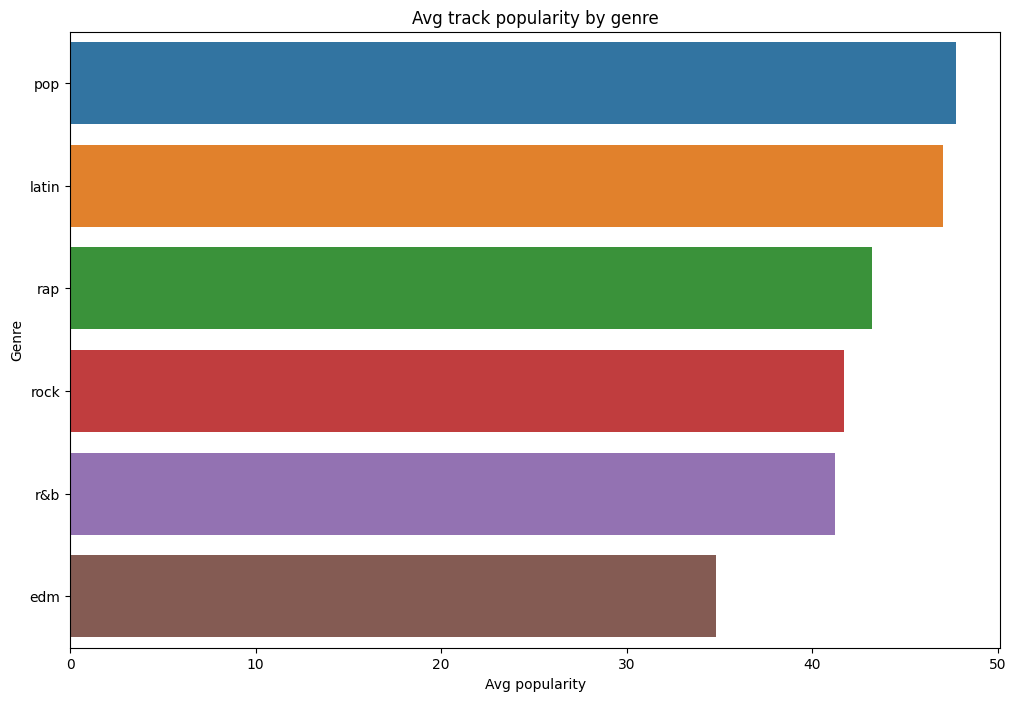

In [10]:
# Visualization of the popularity
plt.figure(figsize=(12,8))
sns.barplot(x = genre_popularity.values, y = genre_popularity.index)
plt.title('Avg track popularity by genre')
plt.xlabel('Avg popularity')
plt.ylabel('Genre')
plt.show

Let's check the distribution.

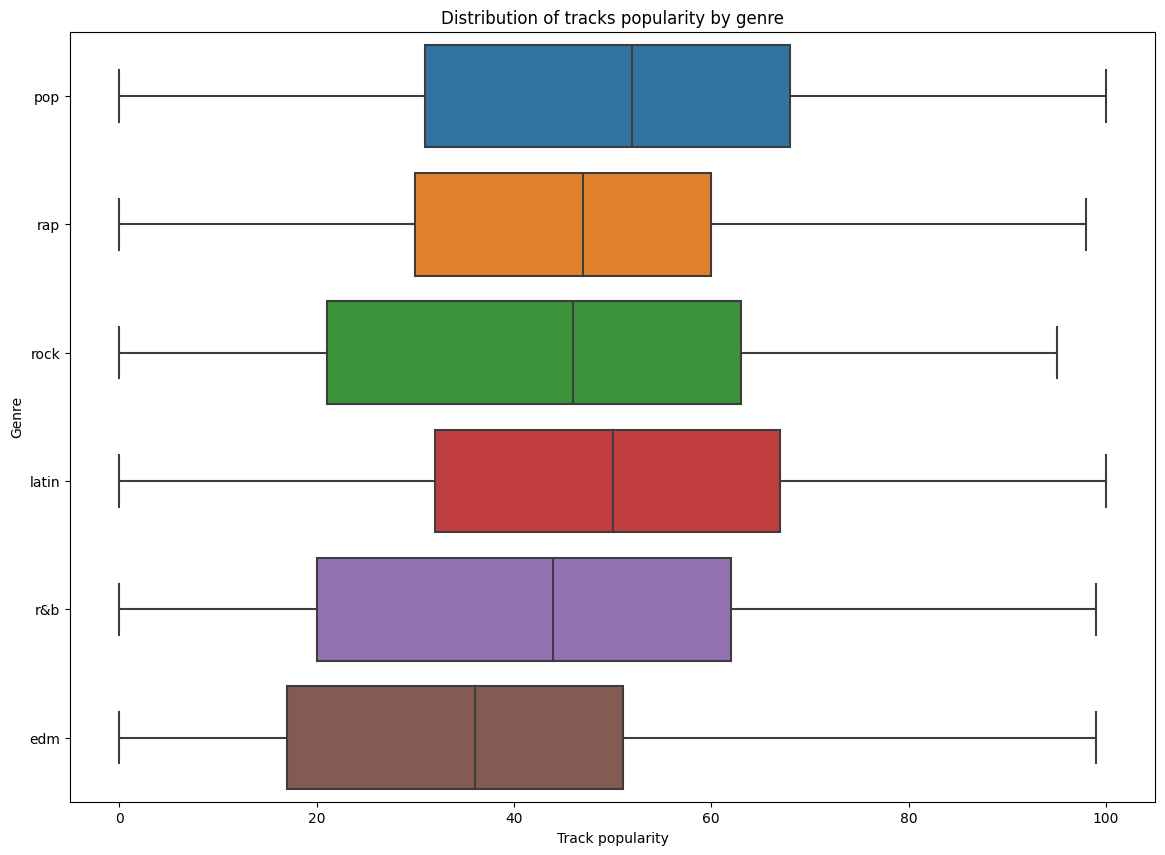

In [11]:
plt.figure(figsize=(14,10))
sns.boxplot(x = 'track_popularity', y = 'playlist_genre', data = df)
plt.title('Distribution of tracks popularity by genre')
plt.xlabel('Track popularity')
plt.ylabel('Genre')
plt.show()

Pop is the most popular genre and as we can see in the illustration being at the center of the axis, having an average spread and a high median value.
Rap is the third most popular genre in this dataset. The box is smaller and has a high median value showing that thre's less variability in popularity but those songs are mostly in the median track popularity value.

*Time duration*

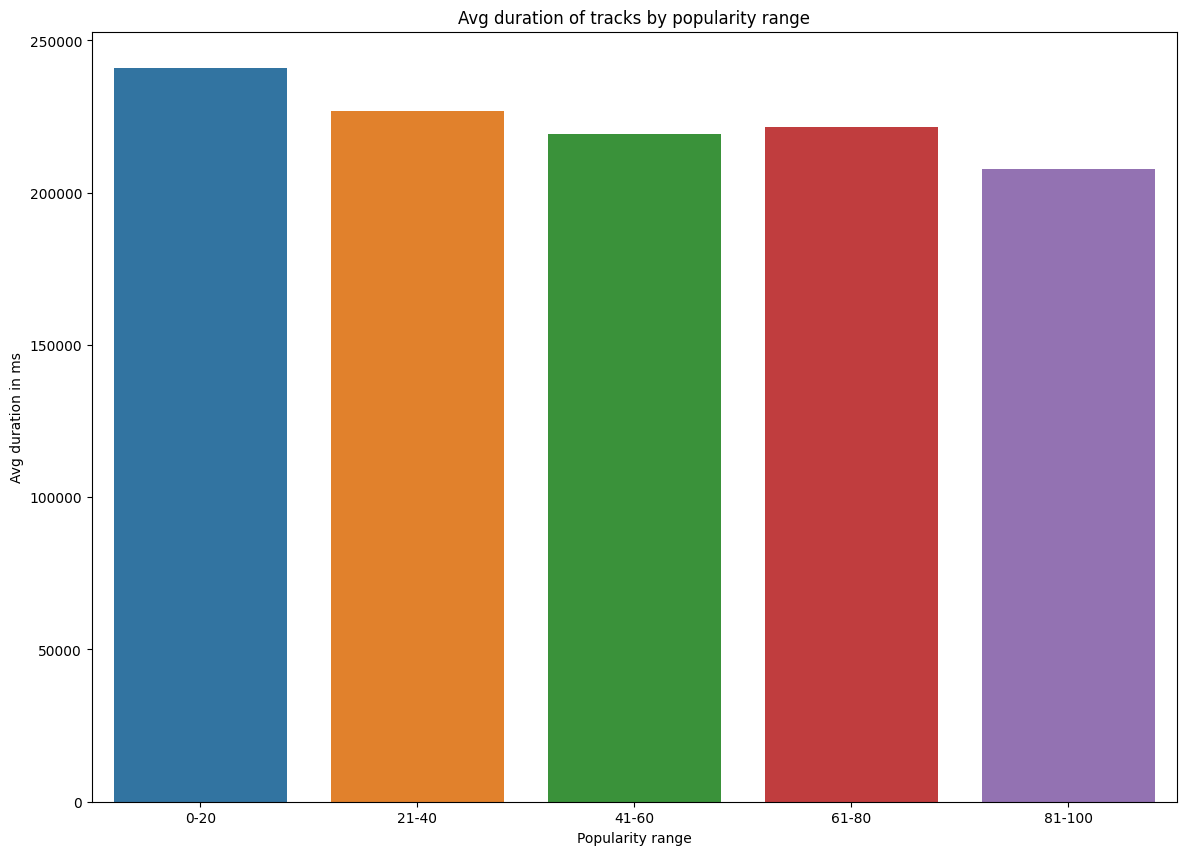

In [12]:
popularity_bins = [0, 20, 40, 60, 80, 100]
popularity_labels = ['0-20','21-40', '41-60', '61-80', '81-100']

df['popularity_range'] = pd.cut(df['track_popularity'], bins = popularity_bins, labels= popularity_labels, include_lowest=True)
duration_by_popularity = df.groupby('popularity_range')['duration_ms'].mean()

# Plot
plt.figure(figsize=(14,10))
sns.barplot(x=duration_by_popularity.index, y = duration_by_popularity.values)
plt.title('Avg duration of tracks by popularity range')
plt.xlabel('Popularity range')
plt.ylabel('Avg duration in ms')
plt.show()

By Genre


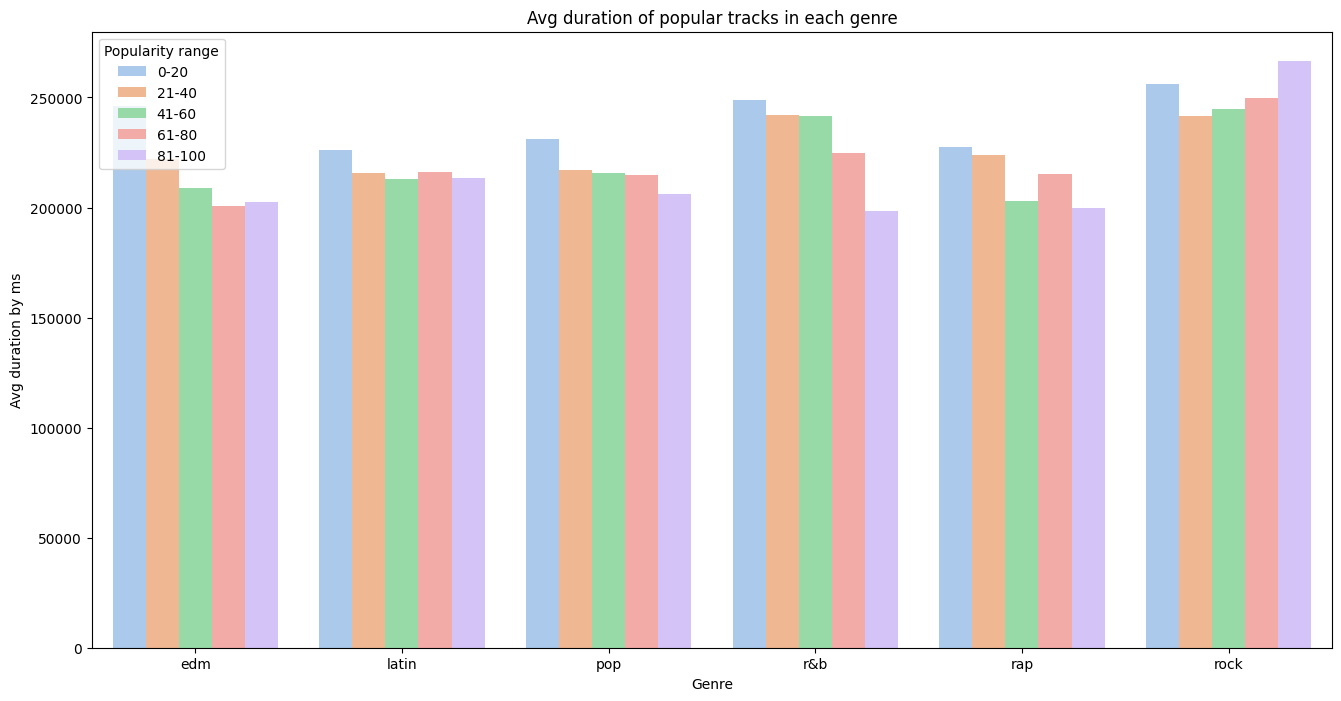

In [13]:
duration_by_genre_popularity = df.groupby(['playlist_genre', 'popularity_range'])['duration_ms'].mean().reset_index()

# Plot

plt.figure(figsize=(16,8))
sns.barplot(x='playlist_genre', y='duration_ms', hue='popularity_range', data = duration_by_genre_popularity, palette='pastel')
plt.title('Avg duration of popular tracks in each genre')
plt.xlabel('Genre')
plt.ylabel('Avg duration by ms')
plt.legend(title='Popularity range')
plt.show()

Observation:  rock's most popular songs have the average longest track duration.

C:\Users\Samantha\AppData\Local\Temp\ipykernel_11916\3785770519.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg_resampled = df_agg.set_index('track_album_release_date').groupby('playlist_genre').resample('Y').mean().reset_index()
C:\Users\Samantha\AppData\Local\Temp\ipykernel_11916\3785770519.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg_resampled = df_agg.set_index('track_album_release_date').groupby('playlist_genre').resample('Y').mean().reset_index()
C:\Users\Samantha\AppData\Local\Temp\ipykernel_11916\3785770519.py:19: FutureWarning: The default value of numeric_only in DataFra

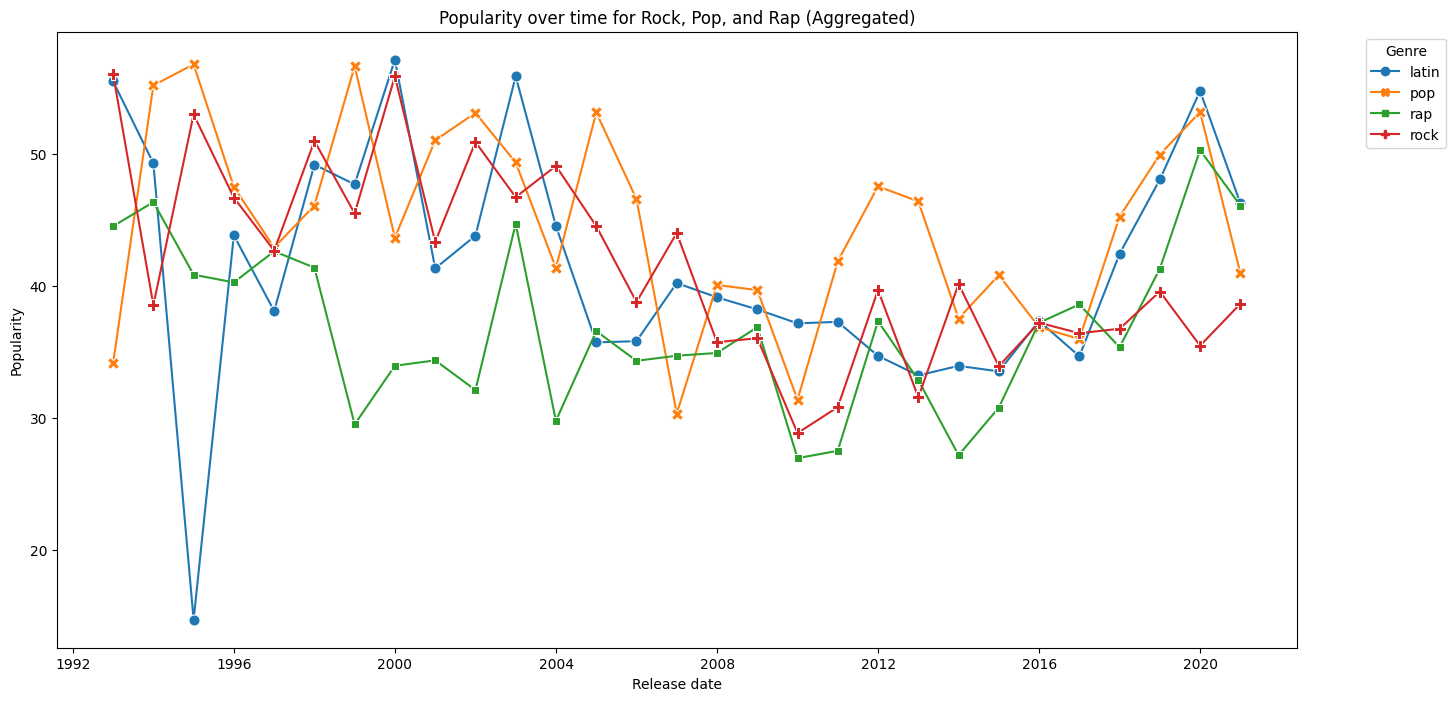

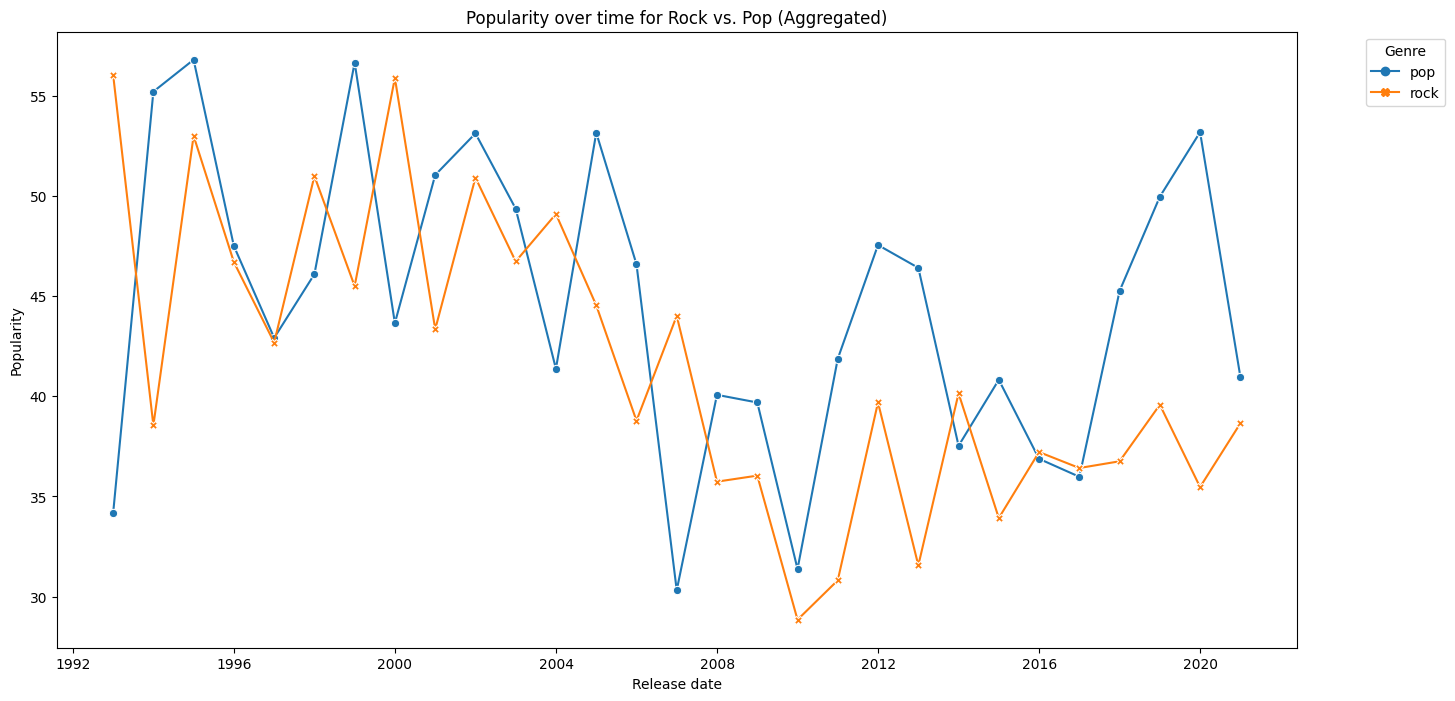

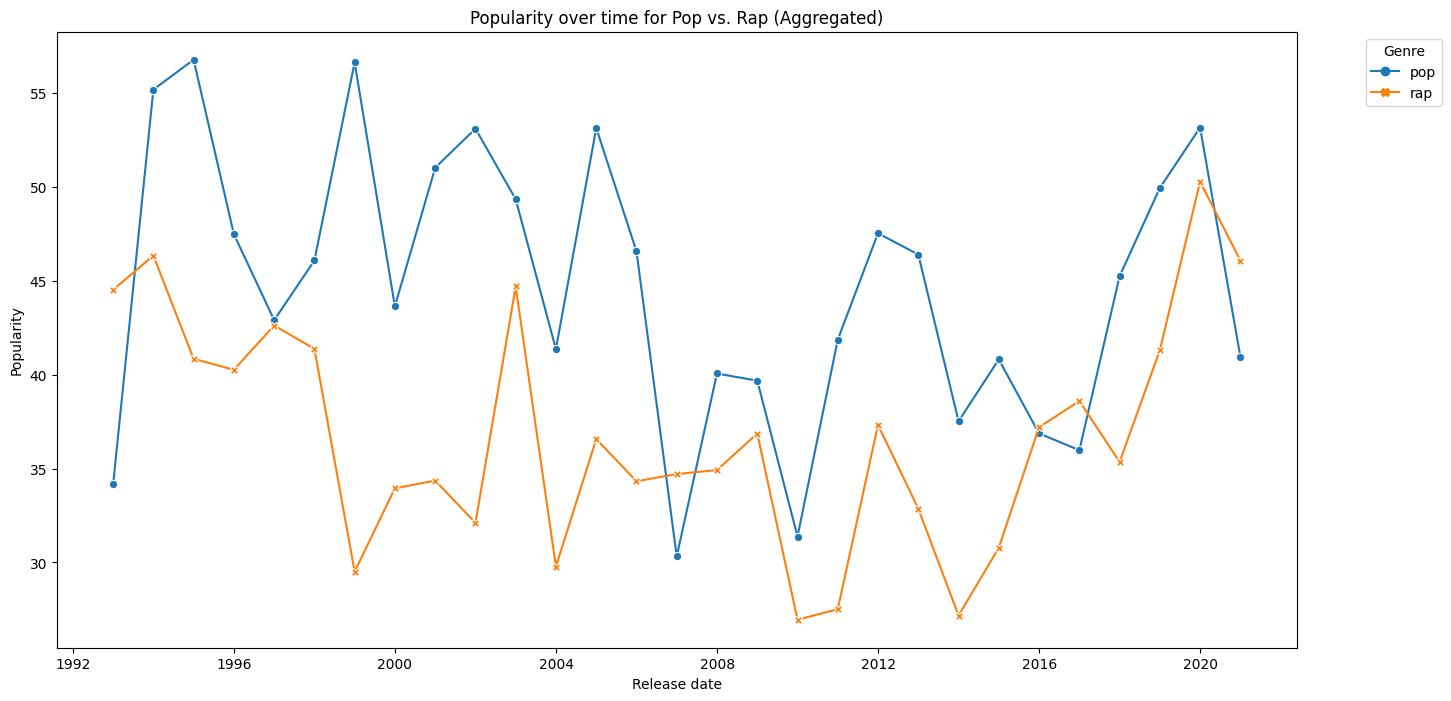

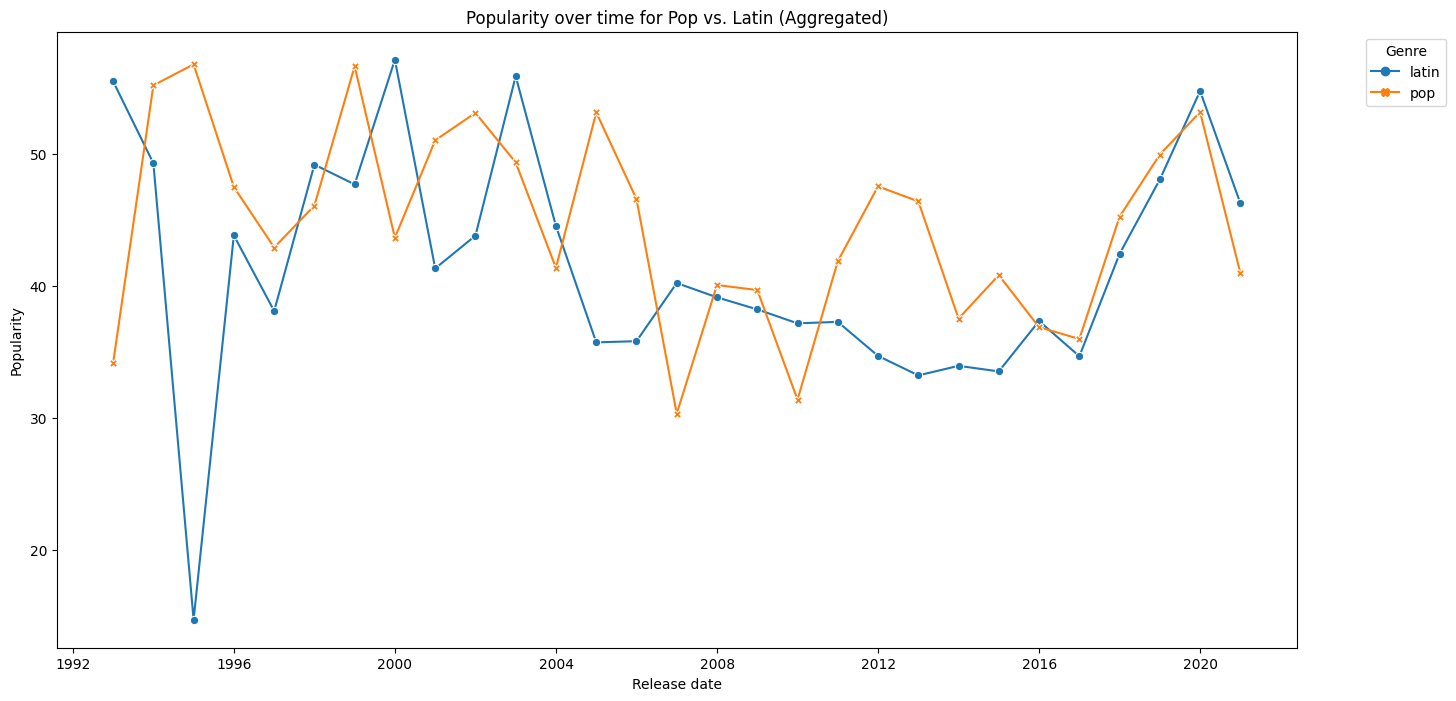

In [48]:
from datetime import datetime
# Convert 'track_album_release_date' to datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])

# Filter data for the last 30 years (from 1992 onwards)
df_last_30_years = df[df['track_album_release_date'] >= datetime(1992, 1, 1)]

# The genres I want to compare
genres_to_compare = ['rock', 'pop', 'rap', 'latin']

# Creating a subset of that data
df_subset = df_last_30_years[df_last_30_years['playlist_genre'].isin(genres_to_compare)]

# Aggregating data by date
df_agg = df_subset.groupby(['track_album_release_date', 'playlist_genre'])['track_popularity'].mean().reset_index()

# Resample the data to a lower frequency in this case set to Yearly to visualize better the evolution of each genre's popularity
df_agg_resampled = df_agg.set_index('track_album_release_date').groupby('playlist_genre').resample('Y').mean().reset_index()

# Plot
plt.figure(figsize=(16, 8))
sns.lineplot(x='track_album_release_date', y='track_popularity', hue='playlist_genre', data=df_agg_resampled, markers=True, style = 'playlist_genre', dashes= False, markersize = 8)

plt.title('Popularity over time for Rock, Pop, and Rap (Aggregated)')
plt.xlabel('Release date')
plt.ylabel('Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Separating figures
plt.figure(figsize=(16, 8))

# Plot Rock vs. Pop
sns.lineplot(x='track_album_release_date', y='track_popularity', data=df_agg_resampled[df_agg_resampled['playlist_genre'].isin(['rock', 'pop'])], hue='playlist_genre', markers=True,style = 'playlist_genre', dashes = False)

plt.title('Popularity over time for Rock vs. Pop')
plt.xlabel('Release date')
plt.ylabel('Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Separating figures II
plt.figure(figsize=(16, 8))

# Plot Pop vs. Rap
sns.lineplot(x='track_album_release_date', y='track_popularity', data=df_agg_resampled[df_agg_resampled['playlist_genre'].isin(['pop', 'rap'])], hue='playlist_genre', markers=True, style = "playlist_genre", dashes = False)

plt.title('Popularity over time for Pop vs. Rap')
plt.xlabel('Release date')
plt.ylabel('Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Adding Pop vs. Latin to the comparison
plt.figure(figsize=(16, 8))

# Plot Pop vs. Latin
sns.lineplot(x='track_album_release_date', y='track_popularity', data=df_agg_resampled[df_agg_resampled['playlist_genre'].isin(['pop', 'latin'])], hue='playlist_genre', markers=True, style="playlist_genre", dashes=False)

plt.title('Popularity over time for Pop vs. Latin')
plt.xlabel('Release date')
plt.ylabel('Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



Rock had the most popular songs during the 90s compared to the other two popular genres. This fact can be related to Grunge and the Alternative scene of the early 90s. Note: this is a simple relation as I'm not implying is a direct cause. 

Latin as a genre starts growing around the early 2000s, with a spike in popularity around 2003, keeps steady until the late 2010s/early2020s. 2003/2004 coincides with Shakira's break in the industry with Laundry Service her first full album entirely in English and Enrique Iglesias career start. Same as above, not causation.

In [55]:

df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])

# Filtering the timeline, 1990-1995
df_1990_1995 = df[(df['track_album_release_date'] >= datetime(1990, 1, 1)) & (df['track_album_release_date'] <= datetime(1995, 12, 31))]
df_1990_1995_most_popular = df_1990_1995.sort_values(by='track_popularity', ascending=False)
df_1996_2001 = df[(df['track_album_release_date'] >= datetime(1996, 1, 1)) & (df['track_album_release_date'] <= datetime(2001, 12, 31))]
df_1996_2001_most_popular = df_1996_2001.sort_values(by='track_popularity', ascending=False)
df_2010_2020 = df[(df['track_album_release_date'] >= datetime(2010, 1, 1)) & (df['track_album_release_date'] <= datetime(2020, 12, 31))]
df_2010_2020_most_popular = df_2010_2020.sort_values(by='track_popularity', ascending=False)
top_n_tracks = 25

print("Genre Counts for the Top", top_n_tracks, "Most Popular Tracks from 1990 to 1995:")
print(df_1990_1995_most_popular.head(top_n_tracks)['playlist_genre'].value_counts().sort_values(ascending=False))

print("Genre Counts for the Top", top_n_tracks, "Most Popular Tracks from 1996 to 2001:")
print(df_1996_2001_most_popular.head(top_n_tracks)['playlist_genre'].value_counts().sort_values(ascending=False))

print("Genre Counts for the Top", top_n_tracks, "Most Popular Tracks from 2010 to 2020:")
print(df_2010_2020_most_popular.head(top_n_tracks)['playlist_genre'].value_counts().sort_values(ascending=False))


Genre Counts for the Top 25 Most Popular Tracks from 1990 to 1995:
rock     17
pop       4
rap       2
r&b       1
latin     1
Name: playlist_genre, dtype: int64
Genre Counts for the Top 25 Most Popular Tracks from 1996 to 2001:
rock    15
pop      4
rap      3
r&b      3
Name: playlist_genre, dtype: int64
Genre Counts for the Top 25 Most Popular Tracks from 2010 to 2020:
latin    10
r&b       5
pop       4
edm       4
rap       2
Name: playlist_genre, dtype: int64
